# Project Description
Used Cars Price Prediction and Evaluation(Car_price.csv)

- Draw important conclusion from the data (eg. priceUSD vs Mileage or year andsegment vs price):

    - Use of proper function like groupby, to draw decisive factors from the data
    
    - Show plots to show trends in data
    
    
- Statistical analysis of data using p values to draw important conclusions is appreciated (eg. T-test or Chi Square Test)


- Create a model to predict the priceUSD columns.

    - Show how you are doing data cleaning and Encoding the data.

    - Use of function over redundant codes for everything is important.

## Import Library

In [1]:
import numpy as np  ## #importing numpy for array operations
import pandas as pd #Importing pandas library for data manipulation
import matplotlib.pyplot as plt # Importing matplotlib for data visualisation
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold ## For splitting the dataset into train test set


from sklearn.preprocessing import StandardScaler  ### Standard Scaler to standardise the features 
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV  ## # Cross-validation 
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
import time

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.pipeline import Pipeline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

## Importing Dataset

In [2]:
df = pd.read_csv(r'E:\mechademy\Car_price\cars_price.csv')
dataset = df.copy()

In [3]:
dataset.columns

Index(['Unnamed: 0', 'make', 'model', 'priceUSD', 'year', 'condition',
       'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color',
       'transmission', 'drive_unit', 'segment'],
      dtype='object')

## Data Characteristics

In [4]:
#########################************************************************######################################
# Data Characteristics
def data_characteristics(dataset):
    
    # Shape of dataset
    print('Shape of the Dataset : {}'.format(dataset.shape))
    print('Number of Rows in Dataset : {}'.format(dataset.shape[0]))
    print('Number of Columns in Dataset : {}'.format(dataset.shape[1]))
    print('-'*50)
    
    # Understanding the Number of Categorical and Numerical Features in Dataset
    numeric_features = dataset.select_dtypes(include = [np.number])
    categoric_features = dataset.select_dtypes(exclude = [np.number])
    
    print('Number of Numerical Features : {}'.format(numeric_features.shape[1]))
    print('Number of categoric Features : {}'.format(categoric_features.shape[1]))
    print('-'*50)
    
    # Unique Values
    print('Number of Unique Values : {}'.format(dataset.nunique()))
    print('-'*50)
    
    # Number of NULL Values
    print('Number of Missing Values : {}'.format(dataset.isnull().sum().sum()))
    
    # Understanding the dataset
    print('Information of the Dataset : {}'.format(dataset.info(verbose = False, memory_usage='deep')))
    print('-'*50)

#########################************************************************######################################

# Dataset Characteristics
print(data_characteristics(dataset))

# Statistical Summary of the dataset
print('Statistical Summary of the Dataset:')
dataset.describe(include = 'all', percentiles = [.15, .25, .50, .75, .85]).transpose()

Shape of the Dataset : (40000, 13)
Number of Rows in Dataset : 40000
Number of Columns in Dataset : 13
--------------------------------------------------
Number of Numerical Features : 5
Number of categoric Features : 8
--------------------------------------------------
Number of Unique Values : Unnamed: 0             40000
make                   93   
model                  991  
priceUSD               2510 
year                   72   
condition              3    
mileage(kilometers)    6392 
fuel_type              3    
volume(cm3)            396  
color                  13   
transmission           2    
drive_unit             4    
segment                9    
dtype: int64
--------------------------------------------------
Number of Missing Values : 5130
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 13 entries, Unnamed: 0 to segment
dtypes: float64(2), int64(3), object(8)
memory usage: 21.1 MB
Information of the Dataset : None
---------------

,count,unique,top,freq,mean,std,min,15%,25%,50%,75%,85%,max
Unnamed: 0,40000,NaN,NaN,NaN,19999.5,11547.1,0,5999.85,9999.75,19999.5,29999.2,33999.2,39999
make,40000,93,volkswagen,4943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,40000,991,passat,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
priceUSD,40000,NaN,NaN,NaN,7430.38,8338.24,95,1500,2350,5350,9850,12900,195000
year,40000,NaN,NaN,NaN,2003.49,8.1149,1938,1996,1998,2004,2010,2012,2019
condition,40000,3,with mileage,39337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage(kilometers),40000,NaN,NaN,NaN,243433,316703,0,90000,137000,228000,308761,350000,1e+07
fuel_type,40000,3,petrol,25869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volume(cm3),39970,NaN,NaN,NaN,2103.2,938.725,500,1500,1600,1995,2300,2500,20000
color,40000,13,black,8867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Head of the dataset
dataset.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


## Percentage of Null Values

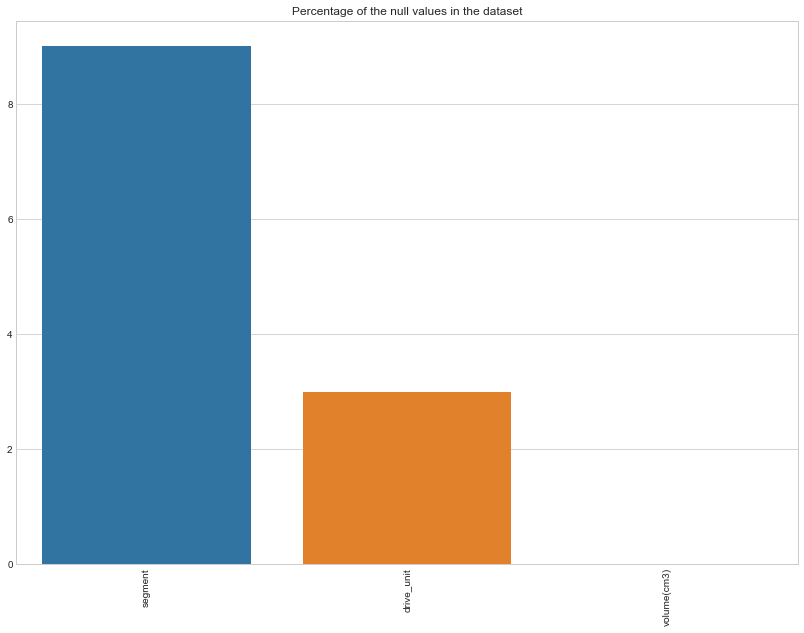

<AxesSubplot:title={'center':'Percentage of the null values in the dataset'}>

In [6]:
# Percentage of Null Vlues
def check_null(dataset):
    null_per = (dataset.isnull().sum() / len(dataset)) * 100
    
    try:
        # droping columns having null percentage to 0
        null_per = round(null_per.drop(null_per[null_per == 0].index)).sort_values(ascending = False)
        
        # plotting the bar plot of NULL %
        plt.figure(figsize = (14,10))
        null_plot = sns.barplot(x = null_per.index , y = null_per)
        plt.xticks(rotation = "90")
        plt.title("Percentage of the null values in the dataset")
        plt.show()
                
    except:
        print("There is NO Null values in the dataset")
        print("Returning the dataset....")
        return dataset
    
    return null_plot

#----------------------------------------------------------------------------#
                
check_null(dataset)

In [7]:
## Null and nan values present in each feature
dataset.isnull().sum()

Unnamed: 0             0   
make                   0   
model                  0   
priceUSD               0   
year                   0   
condition              0   
mileage(kilometers)    0   
fuel_type              0   
volume(cm3)            30  
color                  0   
transmission           0   
drive_unit             1345
segment                3755
dtype: int64

###### Dropping only those record which contains nan and Null values just for processing part. 

###### We will handle the missing value in Data cleaning part.

In [8]:
### Dropna will drop all the missing values of the dataset
ds = dataset.dropna()

### Statistical Test
- ANOVA Test
- Mutual Information

Index(['year'], dtype='object')

,features,f,p
0,make,146.101930,0.000000e+00
1,model,81.258528,0.000000e+00
4,color,359.083108,0.000000e+00
5,transmission,9747.943973,0.000000e+00
6,drive_unit,3206.430922,0.000000e+00
7,segment,1248.638790,0.000000e+00
3,fuel_type,453.780867,4.689774e-100
2,condition,145.220168,1.555348e-63


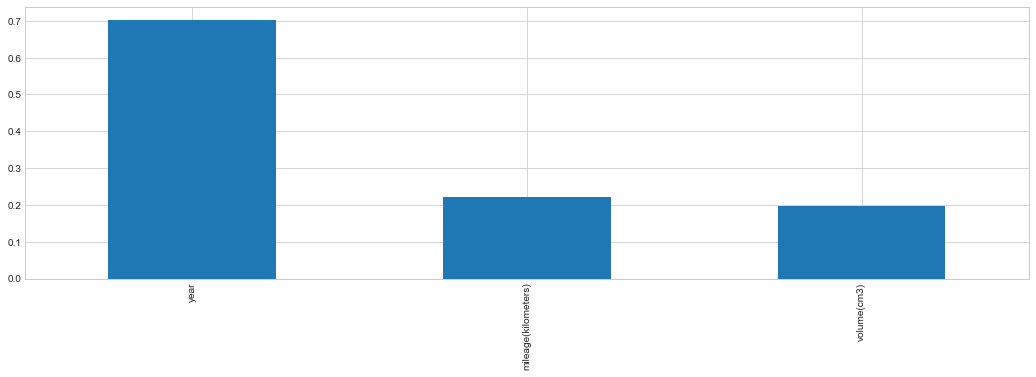

In [9]:
#### Some Statistical Test
## ANOVA Test
class statistical_tests:
    def __init__(self,train,target):
        self.train = train
        self.target = target
    ##################################################################
    
    def Anova(self):
        # Importing scipy library for anova test
        from scipy import stats
        
        train = self.train
        target = self.target
        categoric_features = self.train.select_dtypes(exclude = [np.number]).columns
        train[categoric_features] = train[categoric_features].fillna('missing')
        
        # Marking the Anova
        anova = { 
            'features' : [],
            'f': [], 
            'p': []
                }
        for cat in train[categoric_features]:
            group_prices = []
            
            for group in train[cat].unique():
                group_prices.append(train[train[cat]== group][target].values)
            
            # Applying Anova test using f_oneway 
            f,p = stats.f_oneway(*group_prices)
            anova['features'].append(cat)
            anova['f'].append(f)
            anova['p'].append(p)
            
        anova = pd.DataFrame(anova)
        anova = anova[['features','f','p']]
        anova.sort_values('p',inplace = True)
        
        return anova
    
    ##################################################################
    
    
    def mutual_information(self):
        
        train = self.train
        target = self.target 
        # Choosing the numeric features
        numeric = ['int16','int32','int64','float16','float32','float64']
        numeric_vars = list(self.train.select_dtypes(include = numeric).columns)
        train = self.train[numeric_vars]
        
        # Splitting the numerical dataset into train and test set
        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(train.drop(target,axis =1),
                                                        train[target],
                                                        test_size = 0.3,
                                                        random_state = 0)
        
        from sklearn.feature_selection import mutual_info_regression
        from sklearn.feature_selection import SelectPercentile
        
        mi = mutual_info_regression(x_train,y_train)
        mi = pd.Series(mi)
        mi.index = x_train.columns
        mi = mi.sort_values(ascending = False)
        
        # Plotting the Bar-plot of the dataset
        mi.sort_values(ascending = False).plot.bar(figsize = (18,5)) 
    
        # Selecting the best Numeric Features
        features = SelectPercentile(mutual_info_regression,
                                   percentile = 10).fit(x_train.fillna(0),y_train)
        
        # Returning the Support of the Columns of the x_train
        return x_train.columns[features.get_support()]
    
    #####################################################################
    
# Accessing the class + method
sts = statistical_tests(ds.drop(['Unnamed: 0'],axis=1),'priceUSD')
sts.mutual_information()
sts.Anova()

#### Evaluating the Target Variable

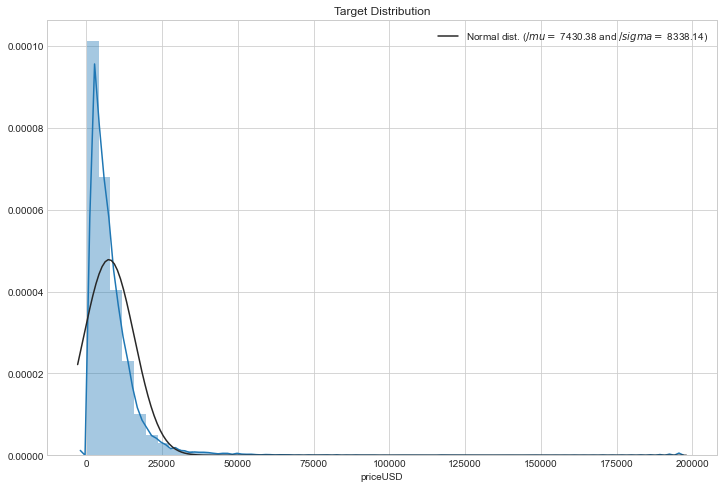

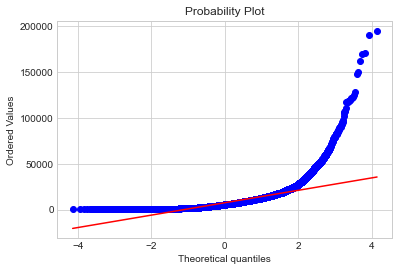

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-4.14048612, -3.93233639, -3.81876073, ...,  3.81876073,
        3.93233639,  4.14048612]), array([    95,    100,    100, ..., 170477, 190141, 195000], dtype=int64)), (6772.876869158584, 7430.3837749999975, 0.8121943976181822))
--------------------------------------------------


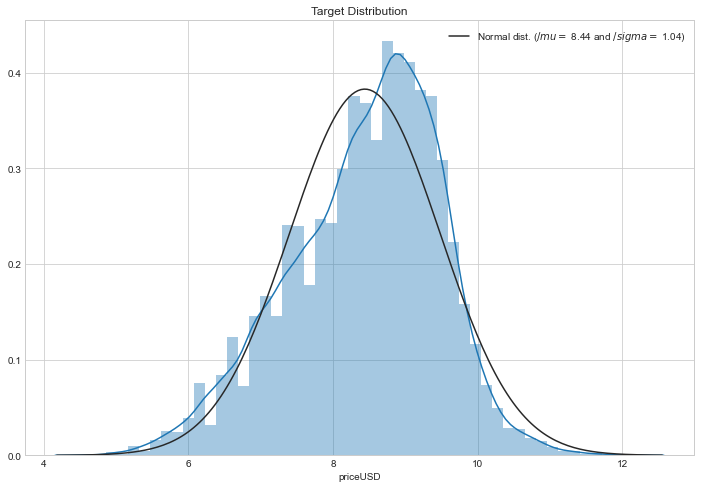

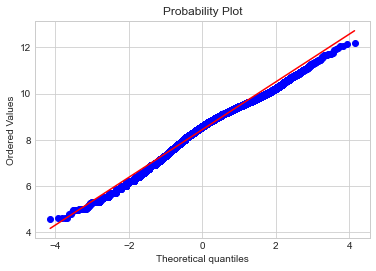

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-4.14048612, -3.93233639, -3.81876073, ...,  3.81876073,
        3.93233639,  4.14048612]), array([ 4.55387689,  4.60517019,  4.60517019, ..., 12.04635567,
       12.15552118, 12.18075484])), (1.0337301764066311, 8.440727222819973, 0.9922947516791875))
--------------------------------------------------


In [10]:
class Transform_target_distribution:
    def __init__(self, target):
        self.target = target
     
    # -------------------- FUNCTION 1: INITIAL DISTRIBUTION -----------------------------#
    # Initial distribution of the Target
    def check_target_distribution(self):
        from scipy import stats
        plt.figure(figsize = (12,8))
        plot1 = sns.distplot(self.target , fit = stats.norm)
        plt.title("Target Distribution")
    
        # getting the params
        (mu, sigma) = stats.norm.fit(self.target)
        # legend of the distribution
        plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
        # making the QQ plot / Probability plot 
        fig = plt.figure()
        plot2 = stats.probplot(self.target, plot = plt)
        plt.show()
    
        # printing the plots
        print(plot1)
        print(plot2)
        print("-"*50)
   
    # -------------------- FUNCTION 2: TRANSFORMED DISTRIBUTION -------------------------#
    # Transforming the distribution of the Target
    def log_distribution(self):
        from scipy import stats
        target2 = np.log(self.target)
        plt.figure(figsize = (12,8))
        plot3 = sns.distplot(target2 , fit = stats.norm)
        plt.title("Target Distribution")
    
        # getting the params
        (mu, sigma) = stats.norm.fit(target2)
        # legend of the distribution
        plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
        # making the QQ plot / Probability plot 
        fig = plt.figure()
        plot4 = stats.probplot(target2, plot = plt)
        plt.show()
    
        print(plot3)
        print(plot4)
        print("-"*50)
        
    #---------------------------------------------------------------------------------------
    

# Accessing the Class
object = Transform_target_distribution(dataset["priceUSD"])
object.check_target_distribution()
object.log_distribution()

### Correration-Coefficient

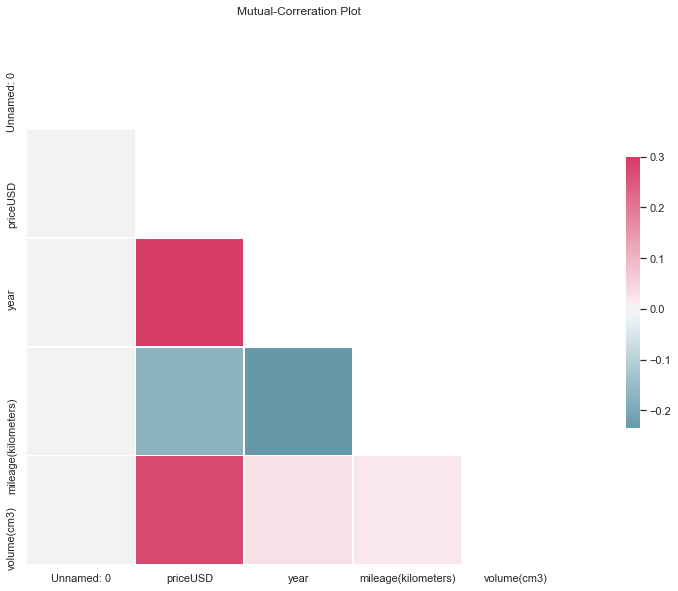

----------------------------------------
Number of Correrated features: 1
List of Correrated Features: ['year']
----------------------------------------
  feature_1 feature_2  correration
0  priceUSD  year      0.608822   
1  year      priceUSD  0.608822   


In [11]:
# Correration-Coefficient class
class Correration:
    def __init__(self, dataset):
        self.dataset = dataset
        
    
    # ------------------------ FUNCTION 1: CORRERATION-COEFFICIENT ------------------------#
    # Making a Correration-coefficient plot
    def correration_coefficient(self):
        # taking only numeric columns + corr_matrix
        numeric_features = self.dataset.select_dtypes(include = [np.number])
        corr_matrix = numeric_features.corr()
        
        # Setting style + mask + axes + custom_cmap
        sns.set(style = "white")
        mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))
        f, ax = plt.subplots(figsize = (20, 10))
        cmap = sns.diverging_palette(220, 1, as_cmap=True)
        
        # Setting the Heatmap
        sns.heatmap(data = corr_matrix, 
                    mask=mask, 
                    cmap=cmap, 
                    vmax=.3, 
                    center=0,
                    square=True, 
                    linewidths=.5, 
                    cbar_kws={"shrink": .5})
        
        plt.title("Mutual-Correration Plot")
        plt.show()
    
    # ----------------------- FUNCTION 2: CORRERATED-FEATURES ---------------------------#
    # Getting the list of Correrated features
    def select_correration(self):
        # making a set
        corr_set = set()
    
        # making a corr matrix
        corr_matrix = self.dataset.corr()
    
        # select value under some threshold
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i,j]) > 0.5:
                    matrix = corr_matrix.columns[i]
                
                    # adding the values in set
                    corr_set.add(matrix)
    
        print("-"*40)
        print("Number of Correrated features: {}".format(len(corr_set)))
        print("List of Correrated Features: {}".format(list(corr_set)))
        print("-"*40)
    
    
    # --------------------- FUNCTION 3: FEATURES-CORRERATION ----------------------------#
    def feature_correration(self):
        corr_matrix = self.dataset.corr()
        corr_matrix = corr_matrix.abs().unstack()
        corr_matrix = corr_matrix.sort_values(ascending = False)
    
        #select values of corr_matrix above the threshold set
        corr_matrix = corr_matrix[(corr_matrix >= 0.5) & (corr_matrix < 1)]
    
        corr_matrix = pd.DataFrame(corr_matrix).reset_index()
        corr_matrix.columns = ["feature_1","feature_2", "correration"]
    
        print(corr_matrix)
    
    #------------------------------------------------------------------------------------#
        
# Accessing the Correration Class + methods
corr_class = Correration(dataset)
corr_class.correration_coefficient()
corr_class.select_correration()
corr_class.feature_correration()


### Understanding the Date-time variable

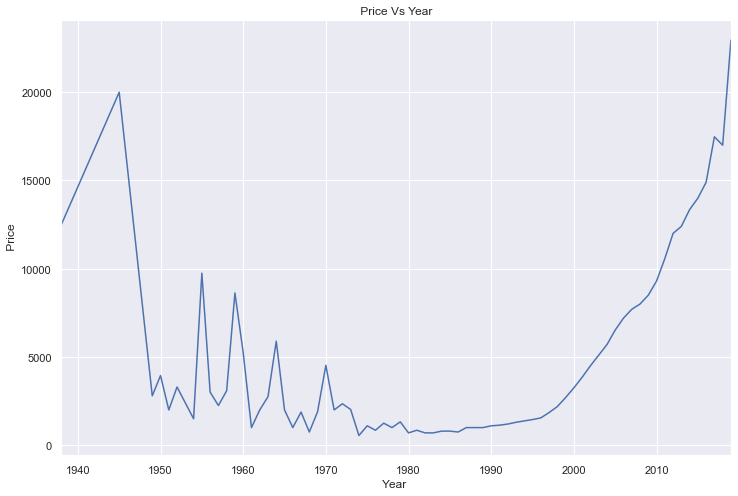

In [12]:
# Understanding the Date-time variable
def date_time_plot(dataset):
    sns.set()
    c_data = dataset.copy()
    
    # grouping YrSold with SalePrice
    dataset.groupby("year")["priceUSD"].median().plot(figsize = (12, 8))
    plt.xlabel("Year ")
    plt.ylabel(" Price")
    plt.title(" Price Vs Year ")
    plt.show()
    
date_time_plot(dataset)

## Categorical Feature and Outlier Analysis

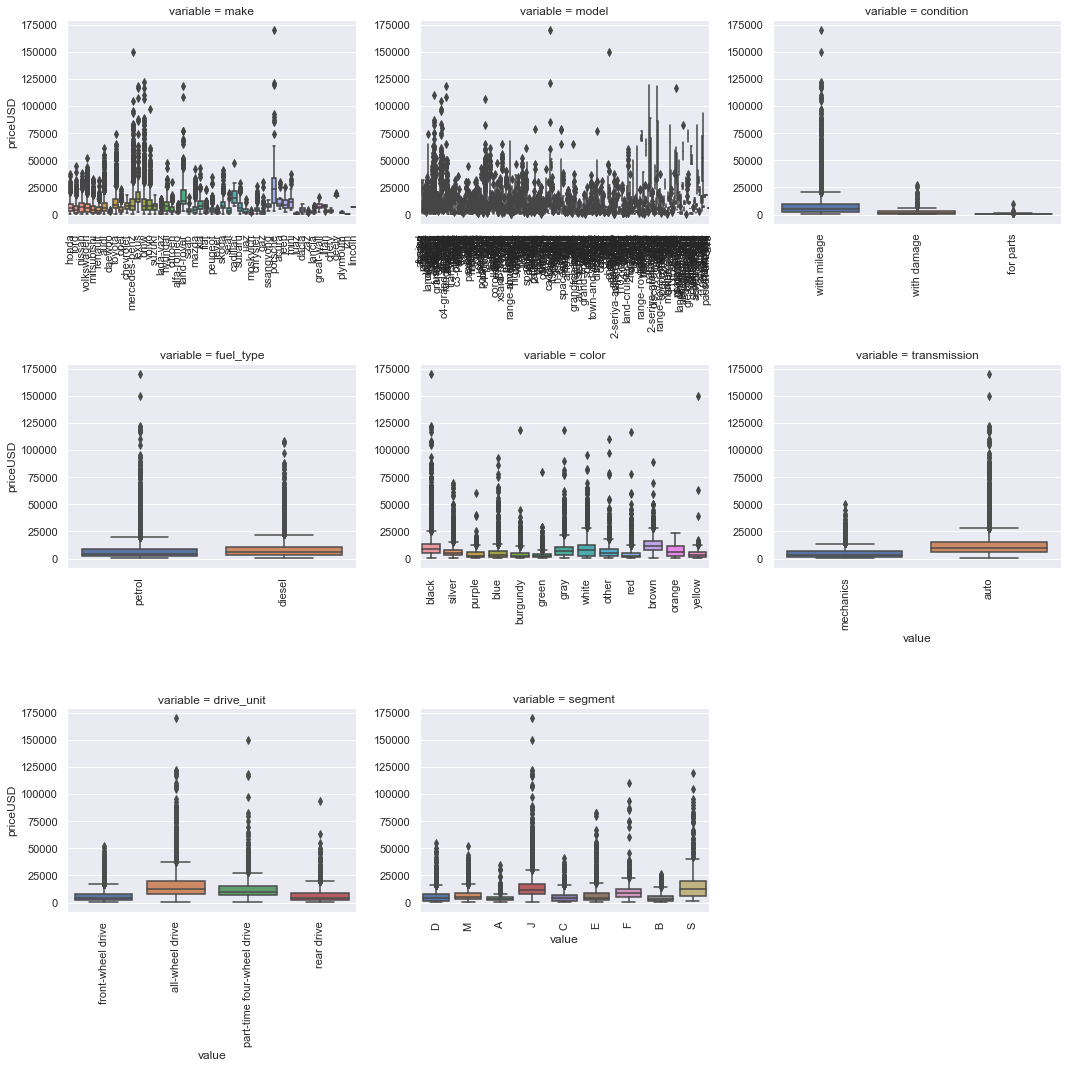

In [13]:
# Categorical Feature Analysis Class
class Categorical_feature_analysis:
    def __init__(self, dataset, train):
        self.dataset = dataset
        self.train = train
        
    # ------------------------------- FUNCTION 1: CARDINALITY ---------------------------------------------#
    # Function to Check Cardinality of the categorical features
    def Cardinality(self):
        for feature in self.dataset.columns:
            # Selecting only the categorical variables
            if self.dataset[feature].dtypes == 'object':
                # Filling the missing values with mode
                self.dataset[feature] = self.dataset[feature].fillna(self.dataset[feature].mode().iloc[0])
                # Selecting the len(unique values) of each categorical
                unique_category = len(self.dataset[feature].unique())
                print("Features in dataset '{column_name}' has '{unique_category}' unique categories".
                      format(column_name = feature, unique_category=unique_category))
    
    
    # --------------------------- FUNCTION 2: CARDINALITY PLOTS {Count plot} -------------------------------#
    def Cardinality_plot(self):
        # Selecting the Categorical features
        categoric_features = self.dataset.select_dtypes(exclude = [np.number])
        # Looping through all the categorical features
        for feature in categoric_features:
            c_data = self.dataset.copy()
            sns.countplot(categoric_features[feature])
            plt.xlabel(feature)
            plt.ylabel("Cardinality")
            plt.title(feature)
            plt.show()
            
    # ------------------------------------- FUNCTION 3: Outliers Analysis ---------------------------------#
    def Outliers_Analysis(self):
        # Selecting the categorical features
        categorical_features = self.train.select_dtypes(exclude = [np.number])
        # Looping through all the categorical features
        for feature in categorical_features:
            self.train[feature] = self.train[feature].astype("category")
            if self.train[feature].isnull().any():
                self.train[feature] = self.train[feature].cat.add_categories(["MISSING"])
                self.train[feature] = self.train[feature].fillna(["MISSING"])
                
        # Function: BOX Plot
        def box_plot(x, y, **kwargs):
            sns.boxplot(x = x, y = y)
            # x->rotation
            x = plt.xticks(rotation = 90)
        
        # Defining the Facedgrid and mapping box_plot 
        f = pd.melt(self.train, id_vars = ["priceUSD"], value_vars = categorical_features)
        g = sns.FacetGrid(f, col = "variable", col_wrap = 3, sharex = False, sharey = False, size = 5)
        g = g.map(box_plot, "value", "priceUSD")
    
    #--------------------------------------------------------------------------------------------------------#
        
        
# Accessing the Categorical Analysis Class + methods
cfa = Categorical_feature_analysis(dataset, ds)
cfa.Outliers_Analysis()

## Numerical Feature Analysis

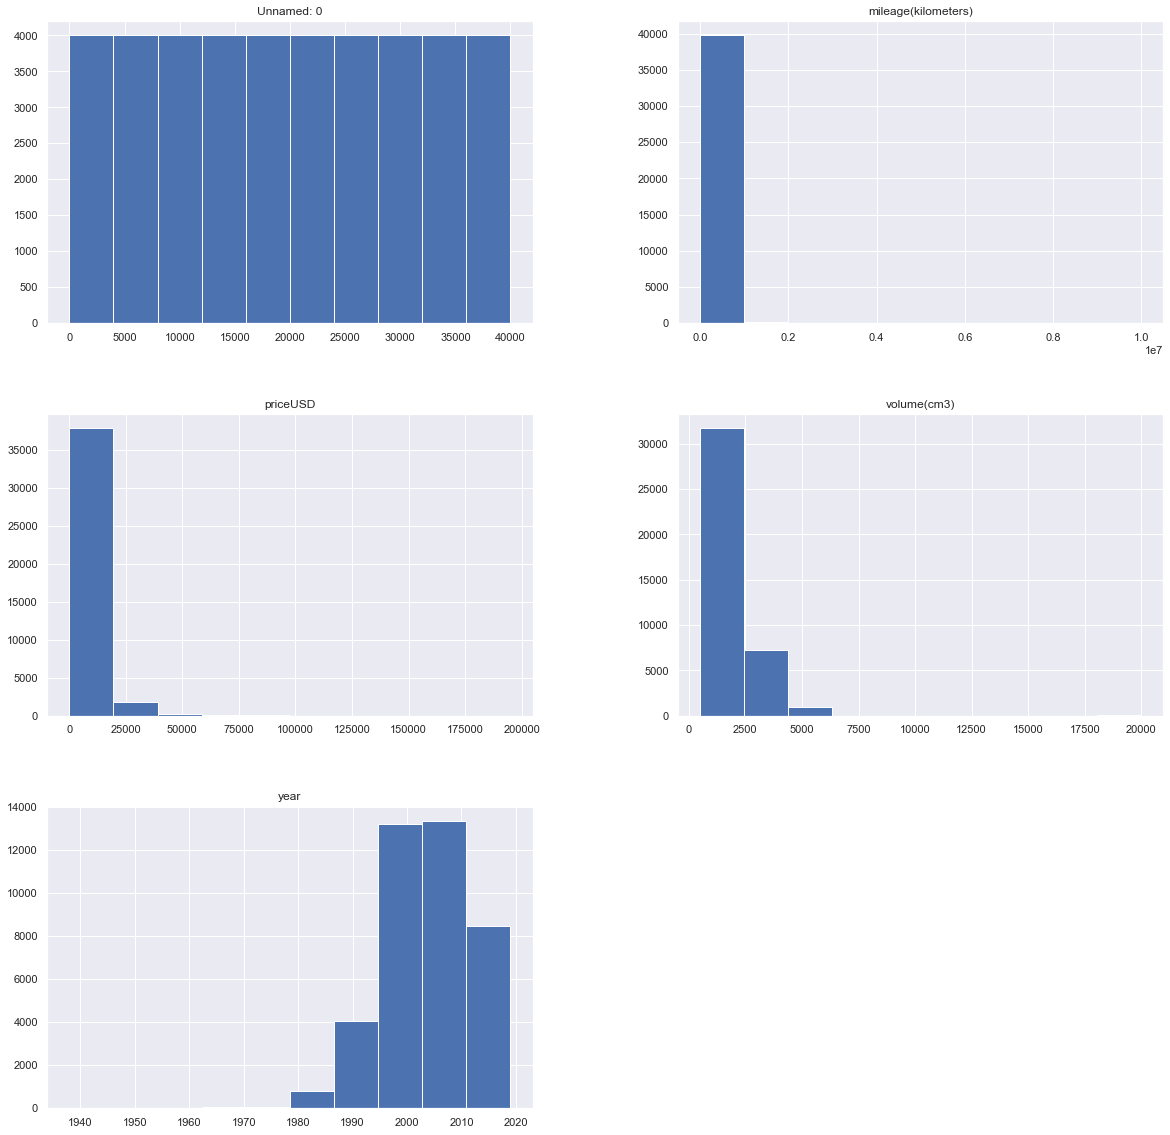

In [14]:
# Numerical Feature Analysis
class Numerical_feature_analysis:
    def __init__(self, dataset, train):
        self.dataset = dataset
        self.train = train
    
    # ------------------------------- FUNCTION 1: DISTRIBUTIONS ---------------------------------------------#
    def distribution_plot(self):
        # Selecting the numeric features
        numeric_feature = self.dataset.select_dtypes(include = [np.number])
        # making  a copy + histplot
        c_data = numeric_feature.copy()
        c_data.hist(figsize = (20,20))
        plt.show()
        
    # -----------------------------------------------------------------------------------------------------#

nfa = Numerical_feature_analysis(dataset, ds)
nfa.distribution_plot()

# Note: Exploratory Data Analysis Notebook
Link : https://github.com/Navu4/Cars_Price_Prediction/blob/main/Exploratory%20Data%20Analysis.ipynb 
- Univariante Analysis
- Bivariante Analysis
- Analysis using Groupby

NoteBook Link : https://github.com/Navu4/Cars_Price_Prediction/blob/main/Exploratory%20Data%20Analysis.ipynb

### Data Cleaning
- Handling Missing Values
- Handling Outliers 

In [15]:
# Displaying different features of the dataset
def dataset_info(dataset):
    # displaying the keys of the dataset
    print("Total Features of the Dataset - ")
    print(dataset.keys())
    print("-"*100)
    
    # displaying the Numeric features
    print("Numerical Features of the Dataset - ")
    numeric = dataset.select_dtypes(include = [np.number])
    print(numeric.keys())
    print("-"*100)
    
    # displaying the categoric features
    print("Categorical Features of the Dataset - ")
    categoric = dataset.select_dtypes(exclude = [np.number])
    print(categoric.keys())
    print("-"*100)

# --------------------------------------------------------------------------------------------------------#
dataset_info(dataset)

Total Features of the Dataset - 
Index(['Unnamed: 0', 'make', 'model', 'priceUSD', 'year', 'condition',
       'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color',
       'transmission', 'drive_unit', 'segment'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Numerical Features of the Dataset - 
Index(['Unnamed: 0', 'priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)'], dtype='object')
----------------------------------------------------------------------------------------------------
Categorical Features of the Dataset - 
Index(['make', 'model', 'condition', 'fuel_type', 'color', 'transmission',
       'drive_unit', 'segment'],
      dtype='object')
----------------------------------------------------------------------------------------------------


In [16]:
# Looking at the dataset
dataset.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


### Dropping the less important features

In [17]:
# Feature 'Unnamed: 0' & 'color' do not having any relation and effect on the price of the car
dataset = dataset.drop(['Unnamed: 0','color'],axis = 1)
dataset.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,mechanics,front-wheel drive,D


In [18]:
dataset.columns

Index(['make', 'model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)',
       'fuel_type', 'volume(cm3)', 'transmission', 'drive_unit', 'segment'],
      dtype='object')

# Handling Missing Values

### Percentage of Null and nan values
- segment and drive_unit are categorical data, so we will replace the nan or null value with most frequent value (mode)
- volumne(cm3) is a numerical data, so we will replace the missing value with the mean value of volumne

In [19]:
print("Total records:")
print(len(dataset))

print(dataset.isna().mean().round(4) * 100)

Total records:
40000
make                   0.00
model                  0.00
priceUSD               0.00
year                   0.00
condition              0.00
mileage(kilometers)    0.00
fuel_type              0.00
volume(cm3)            0.08
transmission           0.00
drive_unit             3.36
segment                9.39
dtype: float64


#### Handling Missing Values for the numerical data

In [20]:
## Handling the numerical data
def missingNumerical(dataset,features):
    ## Handling Missing value of volumne(cm3) feature

    print("Missing Value before use imputation :", dataset[features].isnull().sum())

    dataset[features] = dataset[features].fillna(dataset[features].mean())

    print("Missing Value after use imputation :", dataset[features].isnull().sum())
    return dataset

missingNumerical(dataset,'volume(cm3)')

Missing Value before use imputation : 30
Missing Value after use imputation : 0


,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,mechanics,front-wheel drive,D
...,...,...,...,...,...,...,...,...,...,...,...
39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,auto,all-wheel drive,J
39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,mechanics,front-wheel drive,E
39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,mechanics,rear drive,D
39998,proton,persona,1200,1996,with mileage,250000.0,petrol,1300.0,mechanics,front-wheel drive,NaN


### Handling missing value of Categorical Data
Replacing the missing value with the most frequent value

In [21]:
def missingCategorical(dataset,features):
    for feature in features:
        print("Missing Value before use imputation :", dataset[feature].isnull().sum())
        fillname = dataset[feature].mode()[0]
        dataset[feature] = dataset[feature].fillna(fillname)
        print("Missing Value after use imputation :", dataset[feature].isnull().sum())
    return dataset

missingCategorical(dataset,['drive_unit','segment'])

Missing Value before use imputation : 1345
Missing Value after use imputation : 0
Missing Value before use imputation : 3755
Missing Value after use imputation : 0


,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,mechanics,front-wheel drive,D
...,...,...,...,...,...,...,...,...,...,...,...
39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,auto,all-wheel drive,J
39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,mechanics,front-wheel drive,E
39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,mechanics,rear drive,D
39998,proton,persona,1200,1996,with mileage,250000.0,petrol,1300.0,mechanics,front-wheel drive,D


# Handling Outliers
#### Using Boxplot to identify outliers

<Figure size 2880x2160 with 0 Axes>

<AxesSubplot:>

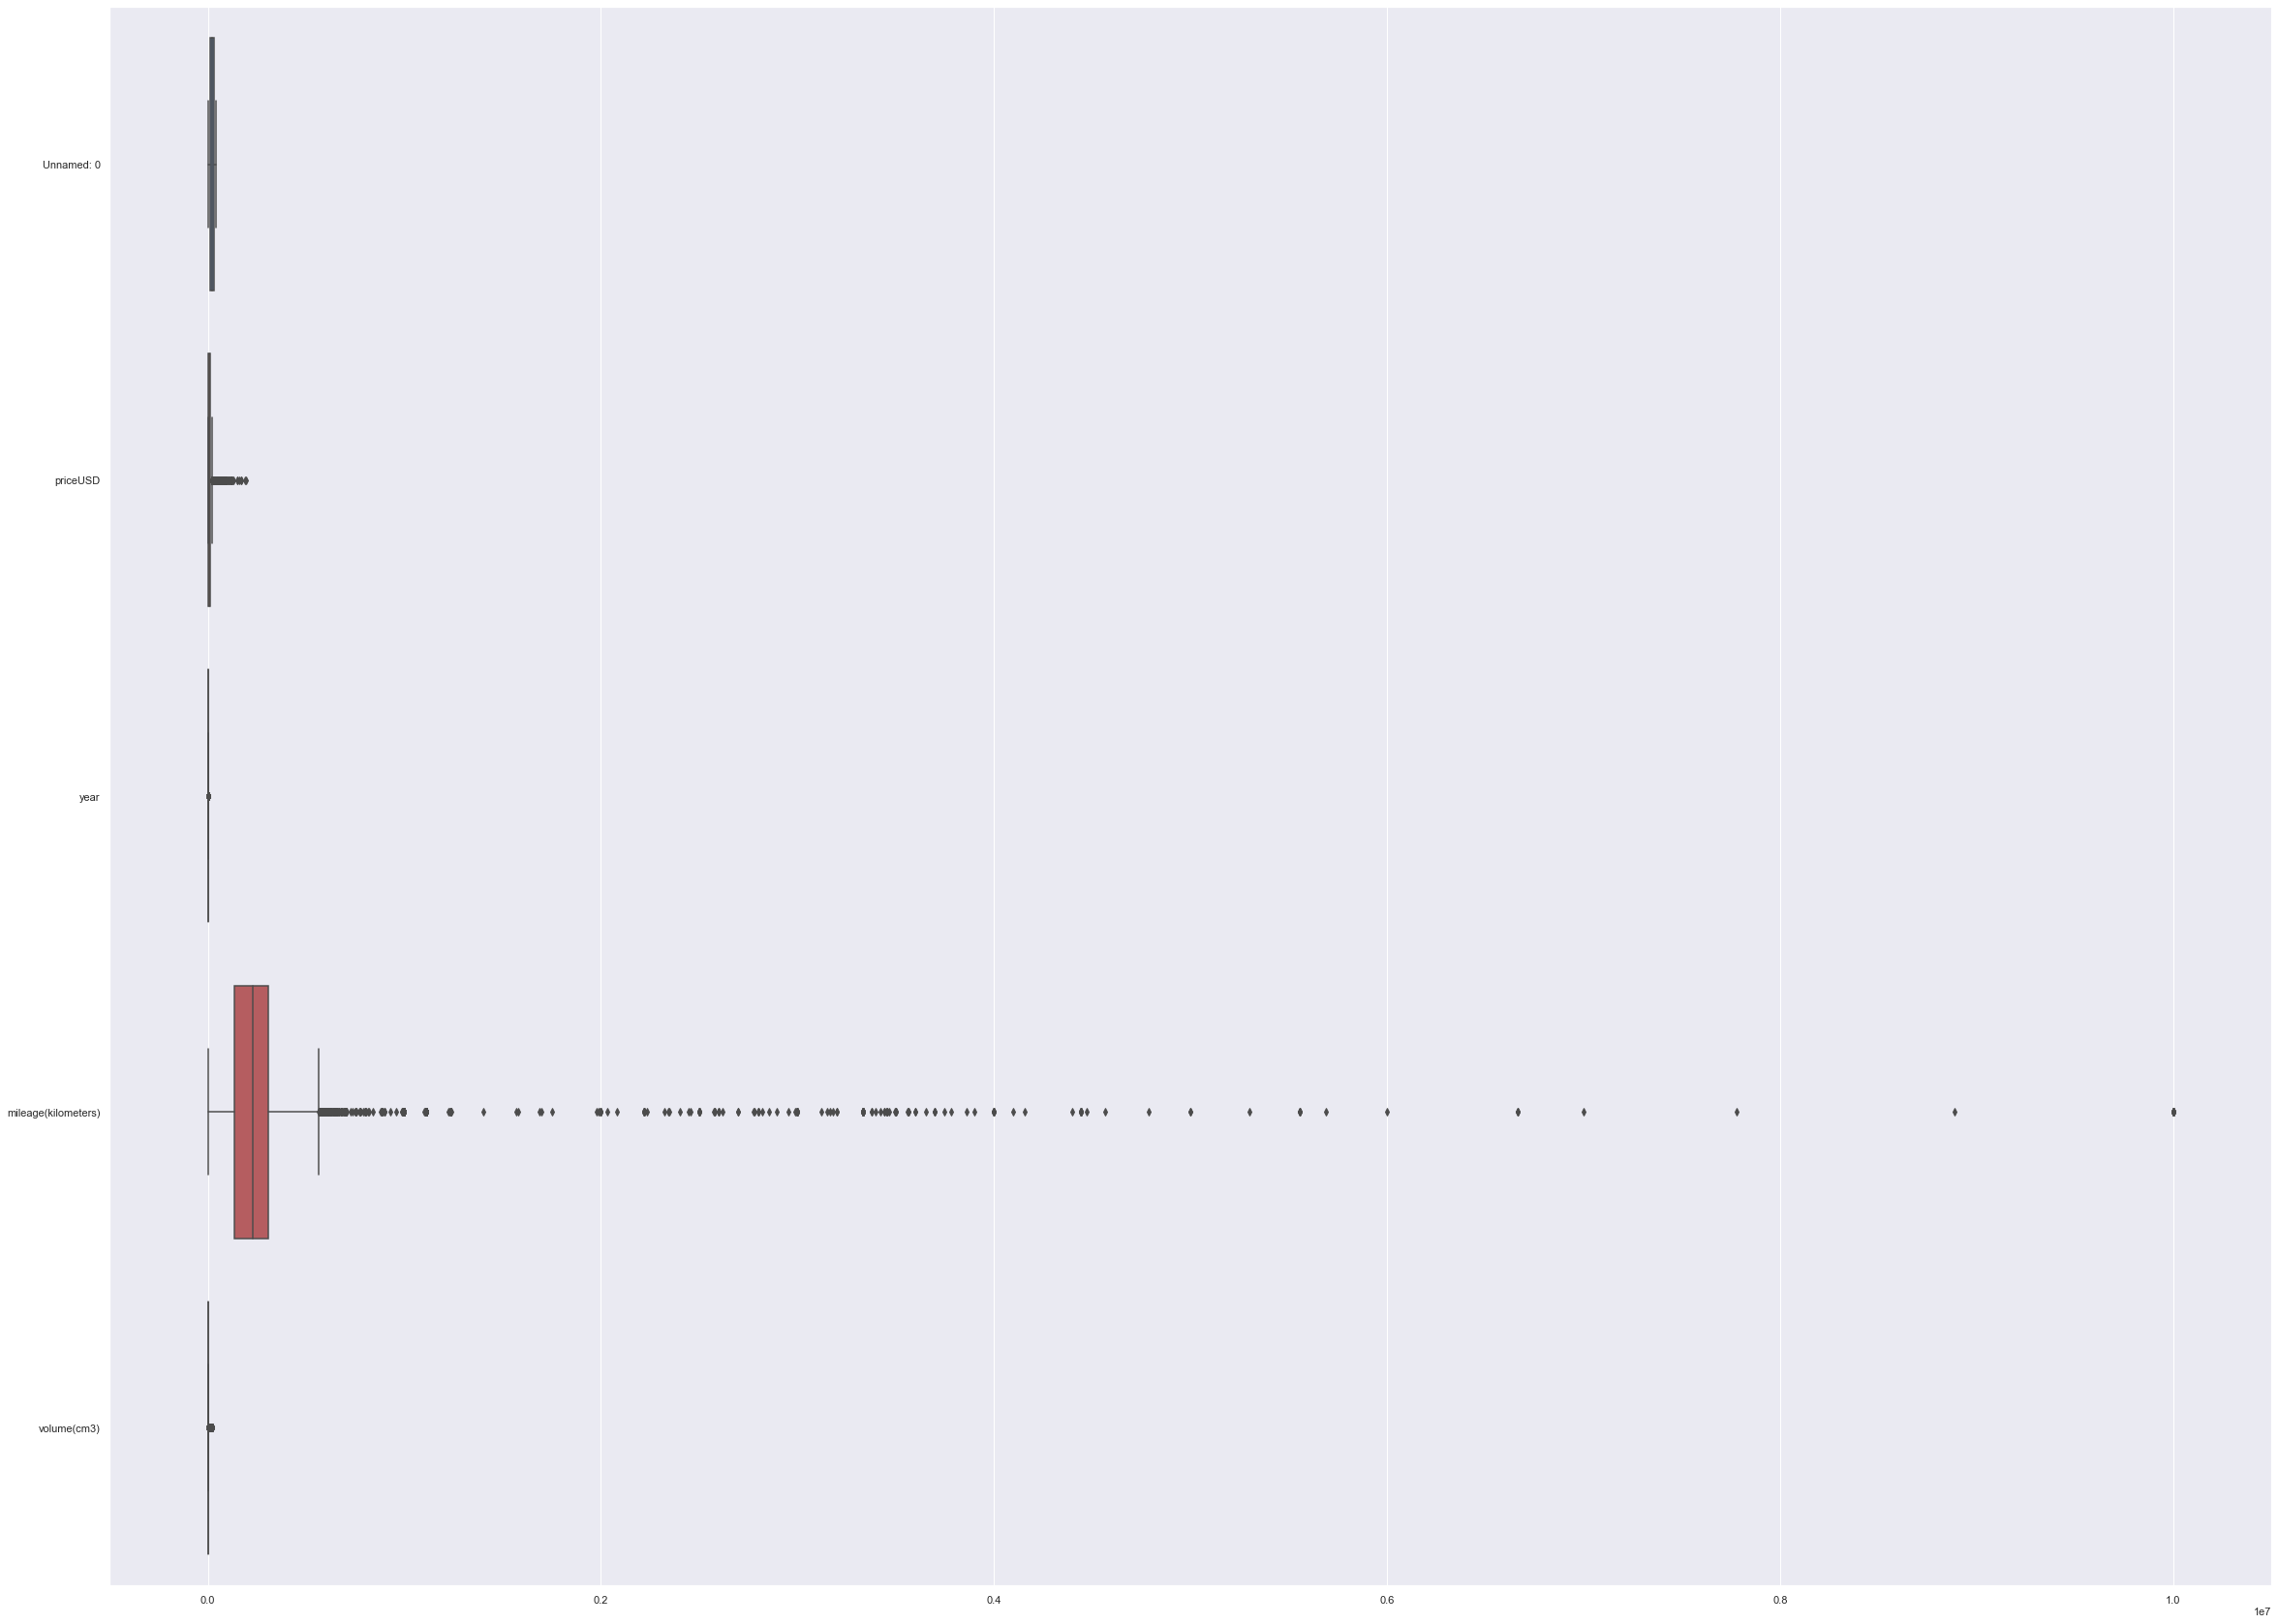

In [22]:
plt.figure(figsize = (40,30))
sns.boxplot(data = df, orient='h')

In [23]:
dataset.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,mechanics,front-wheel drive,D


## Using Log Transformation to handle the outliers\
Transforming the numerical data
- mileage(kilometers)
- volume(cm3)
- priceUSD

<AxesSubplot:>

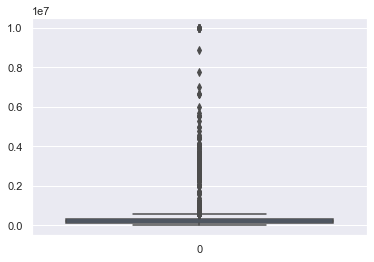

In [24]:
## Before log transform
sns.boxplot(data = dataset['mileage(kilometers)'])

<AxesSubplot:>

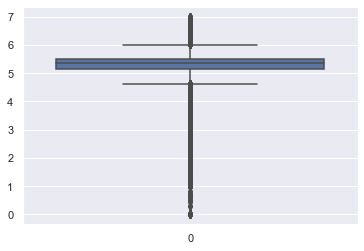

In [25]:
## Before log transform
sns.boxplot(data = np.log10(dataset['mileage(kilometers)']))

<AxesSubplot:>

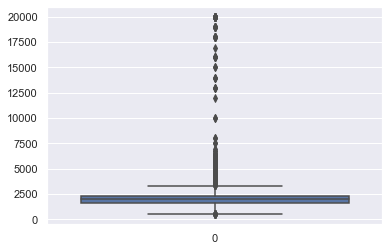

In [26]:
## Similarly for others
## Before log transform
sns.boxplot(data = df['volume(cm3)'])

<AxesSubplot:>

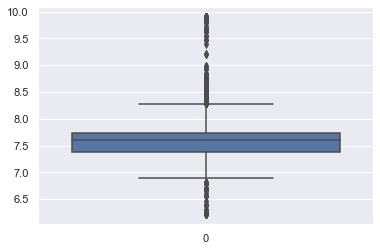

In [27]:
## Before log transform
sns.boxplot(data = np.log(dataset['volume(cm3)']))

# Feature Engineering
- Encoding Categorical Data
- Feature Scaling
- Feature Selection

In [28]:
dataset_info(dataset)

Total Features of the Dataset - 
Index(['make', 'model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)',
       'fuel_type', 'volume(cm3)', 'transmission', 'drive_unit', 'segment'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Numerical Features of the Dataset - 
Index(['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)'], dtype='object')
----------------------------------------------------------------------------------------------------
Categorical Features of the Dataset - 
Index(['make', 'model', 'condition', 'fuel_type', 'transmission', 'drive_unit',
       'segment'],
      dtype='object')
----------------------------------------------------------------------------------------------------


In [29]:
categorical_features = ['make', 'model', 'condition', 'fuel_type', 'transmission',
       'drive_unit', 'segment']

In [30]:
def displayUniqueCategories(dataset,features):
    for feature in features:
        print("Categories in",feature)
        print(dataset[feature].value_counts())
        print("-"*40)
        
displayUniqueCategories(dataset,categorical_features)

Categories in make
volkswagen      4943
audi            2849
bmw             2839
opel            2662
renault         2650
                ... 
aston-martin    1   
aro             1   
dong-feng       1   
jac             1   
roewe           1   
Name: make, Length: 93, dtype: int64
----------------------------------------
Categories in model
passat      1532
5-seriya    1003
a6          896 
golf        783 
astra       698 
           ...  
e-pace      1   
acadia      1   
q8          1   
dbs         1   
f-350       1   
Name: model, Length: 991, dtype: int64
----------------------------------------
Categories in condition
with mileage    39337
with damage     341  
for parts       322  
Name: condition, dtype: int64
----------------------------------------
Categories in fuel_type
petrol        25869
diesel        14101
electrocar    30   
Name: fuel_type, dtype: int64
----------------------------------------
Categories in transmission
mechanics    25630
auto         14370
Name

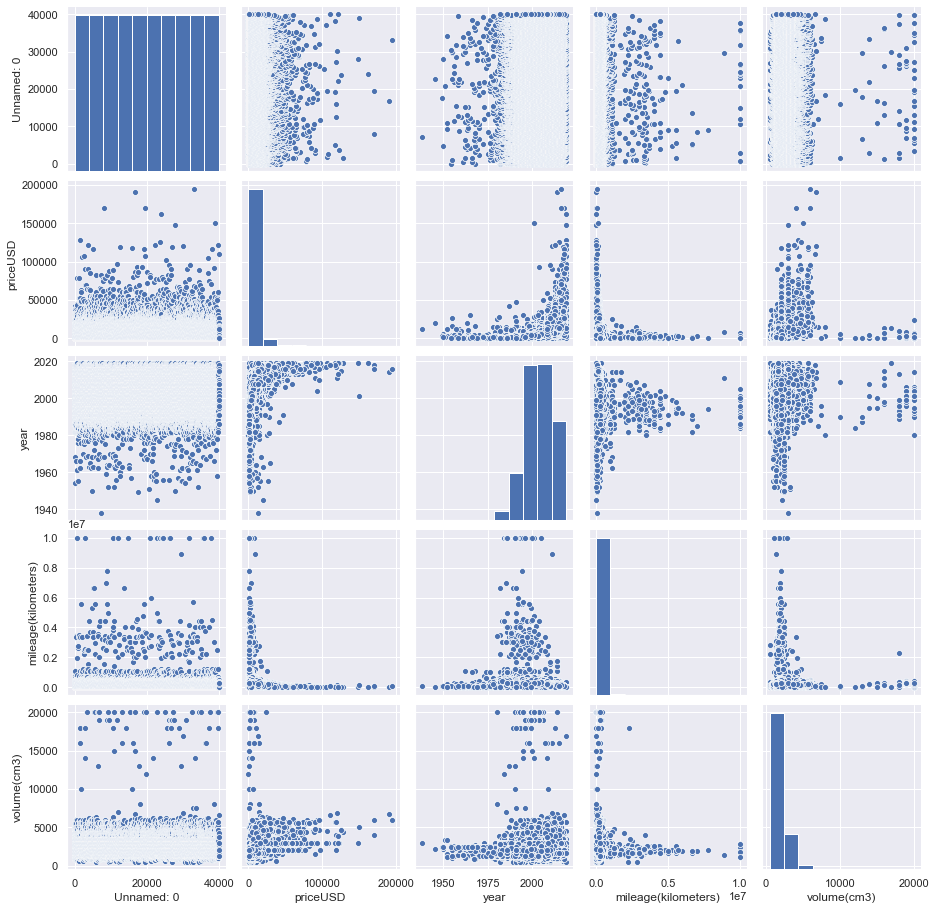

In [31]:
sns.pairplot(data = df)

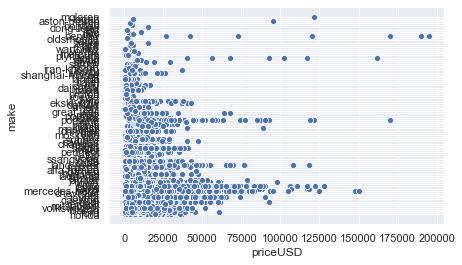

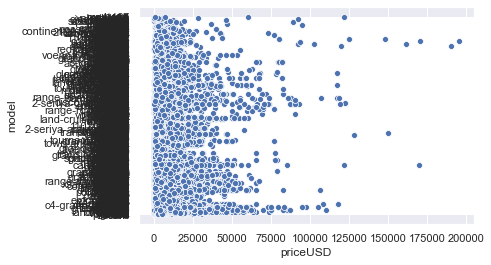

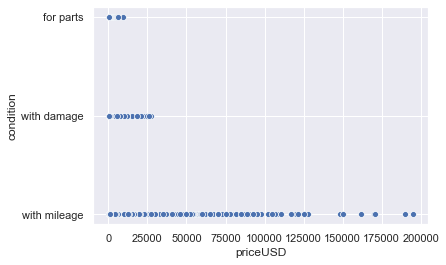

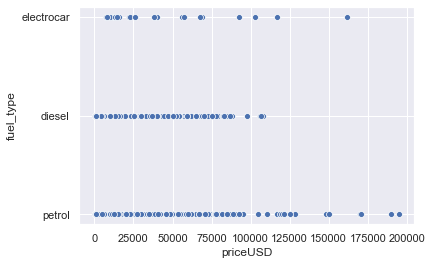

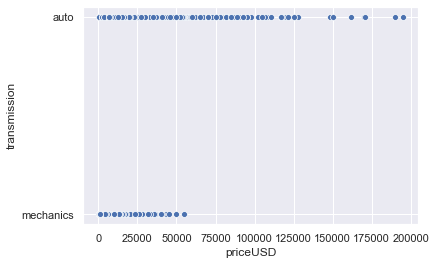

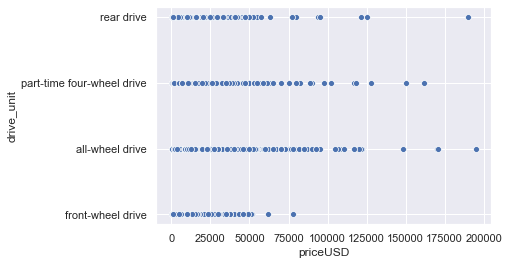

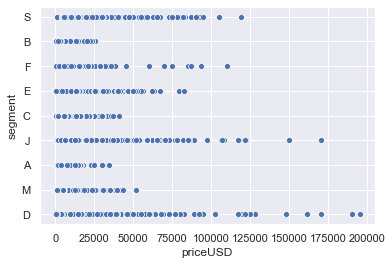

In [32]:
def plotCategoricalFeatures(dataset,features,target):
    for feature in features:
        sns.scatterplot(data = dataset, x = target , y = feature)
        plt.show()
        
plotCategoricalFeatures(dataset,categorical_features,'priceUSD')

### As we can clearly observe that in feature 'make' and 'model' the number of categories present is very high.

### We can simply do OneHot or Label Encoding on other features but for feature 'make' and 'model' we will do Count Frequency encoding or other type of Encoding

In [33]:
categorical_features

['make',
 'model',
 'condition',
 'fuel_type',
 'transmission',
 'drive_unit',
 'segment']

In [34]:
feature_encoding = ['condition',
 'fuel_type',
 'transmission',
 'drive_unit',
 'segment']
feature_encoding

['condition', 'fuel_type', 'transmission', 'drive_unit', 'segment']

In [35]:
#Import library:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df,features):
    le = LabelEncoder()
    #New variable for outlet
    le = LabelEncoder()
    for feature in features:
        df[feature] = le.fit_transform(df[feature])
    
    return df

label_encoding(dataset,feature_encoding)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),transmission,drive_unit,segment
0,honda,accord,565,1993,2,960015.0,2,2000.0,1,1,3
1,ford,fusion,5550,2008,2,172000.0,0,1400.0,1,1,7
2,nissan,teana,8300,2008,2,223000.0,2,2500.0,0,1,3
3,volkswagen,fox,3300,2005,2,140000.0,2,1200.0,1,1,0
4,nissan,primera,2450,2002,1,413000.0,0,2200.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
39995,jeep,grand-cherokee,12500,2008,2,214000.0,2,3700.0,0,0,6
39996,peugeot,607,4754,2001,2,295000.0,2,2200.0,1,1,4
39997,mercedes-benz,c-klass,4000,1999,2,0.0,0,2200.0,1,3,3
39998,proton,persona,1200,1996,2,250000.0,2,1300.0,1,1,3


In [36]:
dataset.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),transmission,drive_unit,segment
0,honda,accord,565,1993,2,960015.0,2,2000.0,1,1,3
1,ford,fusion,5550,2008,2,172000.0,0,1400.0,1,1,7
2,nissan,teana,8300,2008,2,223000.0,2,2500.0,0,1,3
3,volkswagen,fox,3300,2005,2,140000.0,2,1200.0,1,1,0
4,nissan,primera,2450,2002,1,413000.0,0,2200.0,1,1,3


In [37]:
def One_hot_encoding(dataset,feature_encoding):
    #One Hot Coding:
    dataset = pd.get_dummies(dataset, columns = feature_encoding, drop_first = True,)    
    return dataset

dataset = One_hot_encoding(dataset,feature_encoding)

In [38]:
dataset.head()

,make,model,priceUSD,year,mileage(kilometers),volume(cm3),condition_1,condition_2,fuel_type_1,fuel_type_2,...,drive_unit_2,drive_unit_3,segment_1,segment_2,segment_3,segment_4,segment_5,segment_6,segment_7,segment_8
0,honda,accord,565,1993,960015.0,2000.0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,ford,fusion,5550,2008,172000.0,1400.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,nissan,teana,8300,2008,223000.0,2500.0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,volkswagen,fox,3300,2005,140000.0,1200.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,nissan,primera,2450,2002,413000.0,2200.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
dataset_info(dataset)

Total Features of the Dataset - 
Index(['make', 'model', 'priceUSD', 'year', 'mileage(kilometers)',
       'volume(cm3)', 'condition_1', 'condition_2', 'fuel_type_1',
       'fuel_type_2', 'transmission_1', 'drive_unit_1', 'drive_unit_2',
       'drive_unit_3', 'segment_1', 'segment_2', 'segment_3', 'segment_4',
       'segment_5', 'segment_6', 'segment_7', 'segment_8'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Numerical Features of the Dataset - 
Index(['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)', 'condition_1',
       'condition_2', 'fuel_type_1', 'fuel_type_2', 'transmission_1',
       'drive_unit_1', 'drive_unit_2', 'drive_unit_3', 'segment_1',
       'segment_2', 'segment_3', 'segment_4', 'segment_5', 'segment_6',
       'segment_7', 'segment_8'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Categorical Feature

In [40]:
count_frequency_features = ['make', 'model']

In [41]:
# let's have a look at how many labels

for col in count_frequency_features:
    print(col, ': ', len(dataset[col].unique()), ' labels')

make :  93  labels
model :  991  labels


In [42]:
def countFrequencyEncoding(dataset,features):
    for feature in features:
        df_frequency_map = dataset[feature].value_counts().to_dict()
        dataset[feature] = dataset[feature].map(df_frequency_map)
    
    return dataset

countFrequencyEncoding(dataset,count_frequency_features)

,make,model,priceUSD,year,mileage(kilometers),volume(cm3),condition_1,condition_2,fuel_type_1,fuel_type_2,...,drive_unit_2,drive_unit_3,segment_1,segment_2,segment_3,segment_4,segment_5,segment_6,segment_7,segment_8
0,636,198,565,1993,960015.0,2000.0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2157,31,5550,2008,172000.0,1400.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1567,44,8300,2008,223000.0,2500.0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,4943,18,3300,2005,140000.0,1200.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1567,330,2450,2002,413000.0,2200.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,138,82,12500,2008,214000.0,3700.0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
39996,2065,98,4754,2001,295000.0,2200.0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
39997,2502,359,4000,1999,0.0,2200.0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
39998,15,15,1200,1996,250000.0,1300.0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [43]:
data_characteristics(dataset)

Shape of the Dataset : (40000, 22)
Number of Rows in Dataset : 40000
Number of Columns in Dataset : 22
--------------------------------------------------
Number of Numerical Features : 22
Number of categoric Features : 0
--------------------------------------------------
Number of Unique Values : make                   64  
model                  173 
priceUSD               2510
year                   72  
mileage(kilometers)    6392
volume(cm3)            397 
condition_1            2   
condition_2            2   
fuel_type_1            2   
fuel_type_2            2   
transmission_1         2   
drive_unit_1           2   
drive_unit_2           2   
drive_unit_3           2   
segment_1              2   
segment_2              2   
segment_3              2   
segment_4              2   
segment_5              2   
segment_6              2   
segment_7              2   
segment_8              2   
dtype: int64
--------------------------------------------------
Number of Missing Valu

In [44]:
dataset.describe()

,make,model,priceUSD,year,mileage(kilometers),volume(cm3),condition_1,condition_2,fuel_type_1,fuel_type_2,...,drive_unit_2,drive_unit_3,segment_1,segment_2,segment_3,segment_4,segment_5,segment_6,segment_7,segment_8
count,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.0000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000
mean,2135.155050,301.062450,7430.383775,2003.485625,2.434332e+05,2103.201676,0.008525,0.983425,0.000750,0.646725,...,0.064900,0.120225,0.078200,0.187725,0.3185,0.109775,0.01645,0.154025,0.113300,0.013725
std,1368.305869,351.111746,8338.242134,8.114896,3.167033e+05,938.372556,0.091938,0.127674,0.027376,0.477993,...,0.246352,0.325229,0.268489,0.390497,0.4659,0.312613,0.12720,0.360977,0.316963,0.116348
min,1.000000,1.000000,95.000000,1938.000000,0.000000e+00,500.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,966.000000,61.000000,2350.000000,1998.000000,1.370000e+05,1600.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2157.000000,163.000000,5350.000000,2004.000000,2.280000e+05,1996.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2839.000000,406.000000,9850.000000,2010.000000,3.087610e+05,2300.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.0000,0.000000,0.00000,0.000000,0.000000,0.000000
max,4943.000000,1532.000000,195000.000000,2019.000000,9.999999e+06,20000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,1.000000


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 22 columns):
make                   40000 non-null int64
model                  40000 non-null int64
priceUSD               40000 non-null int64
year                   40000 non-null int64
mileage(kilometers)    40000 non-null float64
volume(cm3)            40000 non-null float64
condition_1            40000 non-null uint8
condition_2            40000 non-null uint8
fuel_type_1            40000 non-null uint8
fuel_type_2            40000 non-null uint8
transmission_1         40000 non-null uint8
drive_unit_1           40000 non-null uint8
drive_unit_2           40000 non-null uint8
drive_unit_3           40000 non-null uint8
segment_1              40000 non-null uint8
segment_2              40000 non-null uint8
segment_3              40000 non-null uint8
segment_4              40000 non-null uint8
segment_5              40000 non-null uint8
segment_6              40000 non-null uint8
segment

## Feature Scaling

In [46]:
X = dataset.drop('priceUSD',axis = 1)
X.head()

,make,model,year,mileage(kilometers),volume(cm3),condition_1,condition_2,fuel_type_1,fuel_type_2,transmission_1,...,drive_unit_2,drive_unit_3,segment_1,segment_2,segment_3,segment_4,segment_5,segment_6,segment_7,segment_8
0,636,198,1993,960015.0,2000.0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,2157,31,2008,172000.0,1400.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1567,44,2008,223000.0,2500.0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,4943,18,2005,140000.0,1200.0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1567,330,2002,413000.0,2200.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [47]:
y = dataset.priceUSD
y

0        565  
1        5550 
2        8300 
3        3300 
4        2450 
         ...  
39995    12500
39996    4754 
39997    4000 
39998    1200 
39999    744  
Name: priceUSD, Length: 40000, dtype: int64

In [48]:
scaling_features = ['make','model','year','mileage(kilometers)','volume(cm3)']

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[scaling_features] = sc.fit_transform(X[scaling_features])

In [50]:
X.head()

,make,model,year,mileage(kilometers),volume(cm3),condition_1,condition_2,fuel_type_1,fuel_type_2,transmission_1,...,drive_unit_2,drive_unit_3,segment_1,segment_2,segment_3,segment_4,segment_5,segment_6,segment_7,segment_8
0,-1.095642,-0.293535,-1.292161,2.262657,-0.109981,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0.015965,-0.769173,0.556314,-0.225555,-0.749394,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,-0.415230,-0.732148,0.556314,-0.064519,0.422863,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,2.052085,-0.806199,0.186619,-0.326597,-0.962531,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.415230,0.082418,-0.183076,0.535419,0.103157,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Feature Selection

In [51]:
def f_classifier(X,y):
    """ In this func we will calculate the p value of all the feature of the dataset
    """
    #Import the f_classif function and feed in the features and response:
    [f_stat, f_p_value] = f_classif(X, y)
    
    #create a DataFrame of feature names, F-statistics, and p-values, and show it sorted on p-value:
    f_test_df = pd.DataFrame({'Feature':X.columns,
                              'F statistic':f_stat,
                              'p value':f_p_value})
    print(f_test_df.sort_values('p value'))
    
    return f_test_df

In [52]:
def best_feature(X,y):
    """ This func will return the best feature for our model building
    """
    # Import the SelectPercentile class:
     #To select the top 50% of features according to the F-test
    #from sklearn.feature_selection import SelectPercentile
    #Use the .fit method to fit the object on our features and response data, similar to how a model would be fit:
    
    selector = SelectPercentile(f_classif, percentile=50)
    selector.fit(X, y)
    
    #Capture the indices of the selected features in an array named best_feature_ix:
    best_feature_ix = selector.get_support()
    
    #The feature names can be obtained using all but the last element (the response variable name) of our features_response list by indexing with :-1:
    features = X.columns
    
    best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]
    print(best_features)

In [53]:
def get_corr_matrix(X,y):
    #correlation map
    f,ax = plt.subplots(figsize=(14, 14))
    sns.heatmap(X.join(y).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [54]:
f_test_df = f_classifier(X,y)

                Feature  F statistic        p value
10  drive_unit_1         3.449422     0.000000e+00 
18  segment_6            5.336530     0.000000e+00 
2   year                 35.801092    0.000000e+00 
9   transmission_1       7.670638     0.000000e+00 
4   volume(cm3)          2.689922     0.000000e+00 
7   fuel_type_1          7.733036     0.000000e+00 
6   condition_2          4.064564     0.000000e+00 
20  segment_8            2.370188     9.397320e-249
11  drive_unit_2         2.082229     1.520045e-173
8   fuel_type_2          1.781495     1.357127e-103
14  segment_2            1.547887     7.610137e-58 
19  segment_7            1.396028     1.308009e-33 
3   mileage(kilometers)  1.368864     7.824384e-30 
13  segment_1            1.362160     6.265164e-29 
1   model                1.344452     1.340672e-26 
15  segment_3            1.266304     2.427094e-17 
17  segment_5            1.142036     1.643828e-06 
5   condition_1          1.140348     2.119759e-06 
0   make    

In [55]:
best_feature(X,y)

['year', 'volume(cm3)', 'condition_2', 'fuel_type_1', 'fuel_type_2', 'transmission_1', 'drive_unit_1', 'drive_unit_2', 'segment_6', 'segment_8']


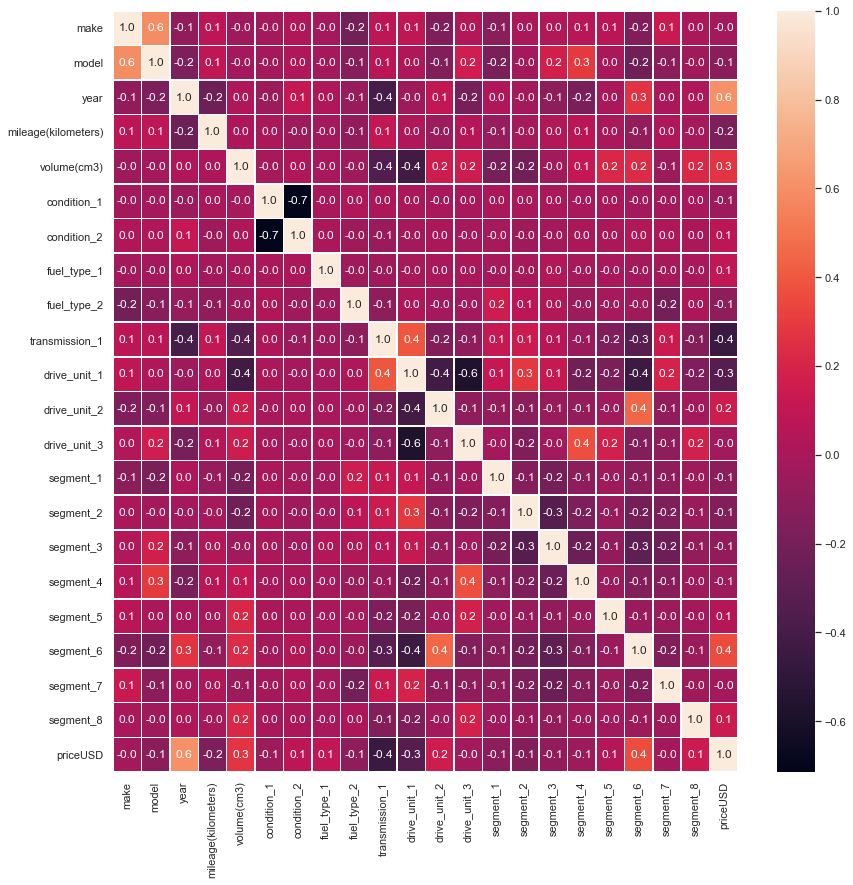

In [56]:
get_corr_matrix(X,y)

### Splitting the data into train and test set

In [57]:
def split(X,y):
    # train and test split
    return train_test_split(X, y, shuffle = False)

In [58]:
X_train,X_test,y_train,y_test = split(X,y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(30000, 21) (10000, 21) (30000,) (10000,)


### Create Baseline Model on the Training set

In [59]:
models_list = []
models_list.append(('LR', LinearRegression()))
models_list.append(('CART', DecisionTreeRegressor()))
models_list.append(('RF', RandomForestRegressor()))
models_list.append(('XGB', XGBRegressor()))

In [60]:
models_list

[('LR', LinearRegression()),
 ('CART', DecisionTreeRegressor()),
 ('RF', RandomForestRegressor()),
 ('XGB',
  XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None))]

In [62]:
from sklearn.metrics import make_scorer,mean_squared_error
num_folds = 10
results= []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring=make_scorer(mean_squared_error))
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (run time: %f)" % (name, cv_results.mean(), end-start))

LR: 32780371.172493 (run time: 0.432842)
CART: 15122306.850722 (run time: 2.513277)
RF: 8668921.936825 (run time: 172.941305)
XGB: 7481868.699804 (run time: 38.074135)


In [63]:
num_folds = 10
modell = []
modell.append(('ADA', AdaBoostRegressor()))
modell.append(('GBC', GradientBoostingRegressor()))
for name, model in modell:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring=make_scorer(mean_squared_error))
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (run time: %f)" % (name, cv_results.mean(), end-start))

ADA: 66759745.449938 (run time: 26.139067)
GBC: 10093724.046652 (run time: 35.120037)


In [70]:
results

[array([29560243.63576102, 34012144.87613101, 32599277.21404587,
        28010905.96876576, 24302329.65059585, 40970625.12354758,
        41031530.51319519, 34700893.65775158, 31307201.7961609 ,
        31308559.28897483]),
 array([14616512.85543519, 13781727.77512037, 15830900.65551852,
        15947307.00840741,  8699978.51525   , 17180246.55207407,
        14248728.94686111, 16499718.45661111, 21256327.62082407,
        13161620.12112037]),
 array([ 8331615.69210916,  6666798.09257972, 10466240.17392861,
         6468622.22807876,  5890587.13512404, 12641766.58105356,
         8700391.65026313,  8943436.92068121,  9264225.27481874,
         9315535.61961278]),
 array([ 7589895.85366109,  5861791.18168556,  7758469.17774122,
         5182995.57797139,  4787755.61444156, 10166078.67629829,
         8557744.60473202,  7369170.19119021, 11086029.68656584,
         6458756.43375224]),
 array([78011682.15593885, 65243697.69233533, 82212385.81799822,
        53100987.8364254 , 69078174.636

Text(0.5, 0.98, 'Performance Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbdd25f470>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbdd25fa20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbdd25f3c8>,
 'medians': [<matplotlib.lines.Line2D at 0x1bbdd25ffd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bbdd2622e8>,
 'means': []}

[Text(1, 0, 'LR'),
 Text(2, 0, 'CART'),
 Text(3, 0, 'RF'),
 Text(4, 0, 'XGB'),
 Text(5, 0, 'ADA'),
 Text(6, 0, 'GBC')]

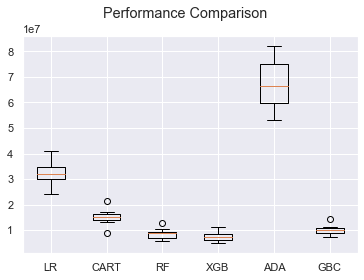

In [71]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hyperparameter tuning

In [72]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [73]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [74]:
model = xgboost.XGBRegressor()

In [75]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## Hyperparameter optimization using RandomizedSearchCV

In [76]:
from sklearn.metrics import mean_squared_error,make_scorer
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [77]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   41.9s remaining:   13.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   48.7s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat


 Time taken: 0 hours 0 minutes and 53.1 seconds.


In [78]:
means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

-10314931.069641 with: {'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.3}
Best parameters with the minimum Mean Square Error are: {'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.3}
-8271877.237531 with: {'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0.0, 'colsample_bytree': 0.3}
-7267298.336979 with: {'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.7}
-7837006.219608 with: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.3}
-7667401.214159 with: {'min_child_weight': 7, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.7}


In [79]:
random_search

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [80]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [81]:
model = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=7, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
#Predicting the Test set results
y_PRED = model.predict(X_train)
y_pred = model.predict(X_test)

## Evalutation using R2 Score and Mean Square Error

In [85]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def Evaluation(model,y,y_pred):
    
    score = r2_score(y,y_pred)
    print("Score:",100*score)
    print("MAE : %.4g" % (mean_absolute_error(y,y_pred)))
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

Evaluation(model,y_train,y_PRED)

Score: 96.27294705285902
MAE : 941.9
RMSE : 1606


In [86]:
Evaluation(model,y_test,y_pred)

Score: 88.7784705189005
MAE : 1159
RMSE : 2812


## Cross Validation 

In [87]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import cross_val_score

def cross_validation(model,X,y):
    
    y_pred = model.predict(X)
    #Perform cross-validation:
    cv_score = cross_val_score(model,X,y, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))

    #Print model report:
    print("\nModel Report")
    print("MAE : %.4g" % (mean_absolute_error(y,y_pred)))
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
# Validation of Whole data set   
cross_validation(model,X,y)


Model Report
MAE : 996.2
RMSE : 1978
CV Score : Mean - 2591 | Std - 487.1 | Min - 1842 | Max - 3854


### Now Let's train our model using best features which we obtained earlier

In [88]:
best_features = ['year', 'volume(cm3)', 'condition_2',
                 'fuel_type_1', 'fuel_type_2', 'transmission_1',
                 'drive_unit_1', 'drive_unit_2', 'segment_6', 'segment_8']

In [89]:
X_df = X[best_features] 
X_df

,year,volume(cm3),condition_2,fuel_type_1,fuel_type_2,transmission_1,drive_unit_1,drive_unit_2,segment_6,segment_8
0,-1.292161,-0.109981,1,0,1,1,1,0,0,0
1,0.556314,-0.749394,1,0,0,1,1,0,0,0
2,0.556314,0.422863,1,0,1,0,1,0,0,0
3,0.186619,-0.962531,1,0,1,1,1,0,0,0
4,-0.183076,0.103157,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
39995,0.556314,1.701689,1,0,1,0,0,0,1,0
39996,-0.306308,0.103157,1,0,1,1,1,0,0,0
39997,-0.552771,0.103157,1,0,0,1,0,0,0,0
39998,-0.922466,-0.855962,1,0,1,1,1,0,0,0


In [90]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_df,y)
timer(start_time) # timing ends here for "start_time" variable

means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   16.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   18.3s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat


 Time taken: 0 hours 0 minutes and 19.8 seconds.
-11665059.846258 with: {'min_child_weight': 7, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.4}
-11073687.979938 with: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}
-11156130.856111 with: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.7}
-12642280.949396 with: {'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.4}
Best parameters with the minimum Mean Square Error are: {'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.4}
-11830173.625362 with: {'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.3}


In [91]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [92]:
model = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
X_train,X_test,y_train,y_test = split(X_df,y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(30000, 10) (10000, 10) (30000,) (10000,)


In [94]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
#Predicting the Test set results
y_PRED = model.predict(X_train)
y_pred = model.predict(X_test)

In [96]:
Evaluation(model,y_train,y_PRED)
print("-"*40)
Evaluation(model,y_test,y_pred)

Score: 88.66372534454227
MAE : 1483
RMSE : 2801
----------------------------------------
Score: 82.98219822267345
MAE : 1550
RMSE : 3463


In [97]:
cross_validation(model,X_df,y)


Model Report
MAE : 1500
RMSE : 2980
CV Score : Mean - 3291 | Std - 575 | Min - 2473 | Max - 4742
